In [119]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [120]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/azhar2ds/DataSets/master/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#DataFrame.skew()
#DataFrame.corr(method='pearson')

pandas.core.frame.DataFrame

In [121]:
data.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [122]:
data.corr(method='pearson')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [123]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


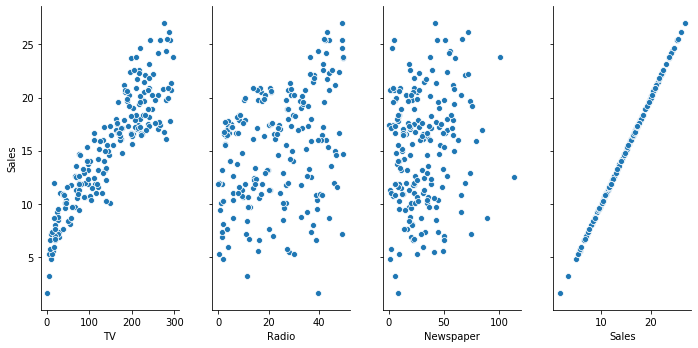

In [140]:
sns.pairplot(data, x_vars=data.columns, y_vars='Sales', size=5, aspect=0.5)

In [165]:
X=data.iloc[:,:1]# we are selecting only one TV columns
y=data['Sales']

#### Statmodel prediction  ####

In [166]:
statobj=smf.ols(formula='Sales~TV',data=data).fit()
print("Statsmodel object function [Param] we easily fine y-intercept & Slope")
print(statobj.params)
print('RSQUARED Values:', statobj.rsquared)

Statsmodel object function [Param] we easily fine y-intercept & Slope
Intercept    6.974821
TV           0.055465
dtype: float64
RSQUARED Values: 0.8121757029987414


In [169]:
#Predicting using statsmodels object
X_new=pd.DataFrame({'TV':[50]}) # if we spend $50,000 then we are taking 50 for sales
print('If we spend $50,000 then our sales will be:',statobj.predict(X_new)*1000)

If we spend $50,000 then our sales will be: 0    9748.060012
dtype: float64


In [ ]:
statobj.summary()

#### Linear Regression model prediction  ####

In [179]:
l=LinearRegression()
l.fit(X,y)
print('Intercept:',l.intercept_,'\nCoefficient:',l.coef_)
#now with the help of intercept and slope we can easily predict the sales.

Intercept: 6.974821488229891 
Coefficient: [0.05546477]


In [191]:
print('If we speand $50,000 the our sales will be: ',l.predict(X_new) *1000)# our X_new vlaue is 50,000

If we speand $50,000 the our sales will be:  [9748.06001171]
